# Custom Layers in Keras

# Task 1: Importing Libraries

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework

TensorFlow Version: 1.14.0


# Task 2: Import and Visualize Dataset

11493376/11490434 [==============================] - 3s 0us/step


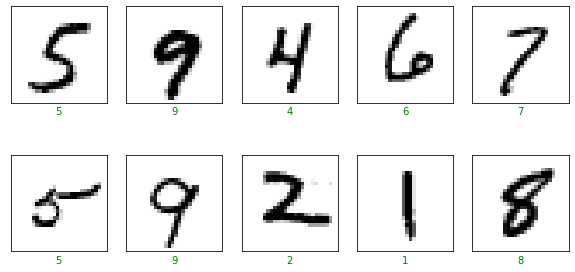

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()

# Task 3: Creating a Custom Layer

In [3]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

# Task 4: Creating the Model

In [4]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Task 5: Model Training

In [5]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2834 - acc: 0.9193 - val_loss: 0.1407 - val_acc: 0.9584
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1180 - acc: 0.9652 - val_loss: 0.1060 - val_acc: 0.9669
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0863 - acc: 0.9739 - val_loss: 0.0920 - val_acc: 0.9719
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0675 - acc: 0.9794 - val_loss: 0.0828 - val_acc: 0.9745
Epoch 5/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0547 - acc: 0.9828 - val_loss: 0.0985 - val_acc: 0.9694
Final alpha: [array([-0.97453433], dtype=float32)]


In [ ]:
utils.plot_results(h).show()

# Task 6: Comparison with ReLU

In [7]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3035 - acc: 0.9147 - val_loss: 0.1802 - val_acc: 0.9474
Epoch 2/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1461 - acc: 0.9570 - val_loss: 0.1293 - val_acc: 0.9603
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1067 - acc: 0.9680 - val_loss: 0.1004 - val_acc: 0.9681
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0825 - acc: 0.9754 - val_loss: 0.0952 - val_acc: 0.9715
Epoch 5/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0677 - acc: 0.9797 - val_loss: 0.0851 - val_acc: 0.9740


In [ ]:
utils.plot_results(h).show()